<a href="https://colab.research.google.com/github/codiak/DTSA-5511/blob/main/DTSA_5511_Kaggle_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with Disaster Tweets
### Kaggle project as part of CU Boulder DTSA-5511

"Deep Learning" class participation in the Kaggle competition:
[Natural Language Processing with Disaster Tweets](https://www.kaggle.com/c/nlp-getting-started/overview)

This project's goal is to identify tweets referencing a _real_ disaster, through using NLP techniques and in the case of the class making use of a model architecture in the RNN family.

Completed by Cody P (@codiak).

Github repo: https://github.com/codiak/DTSA-5511

In [12]:
# Import necessary libraries
!pip install kaggle
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

### Data Fetching

Using the Kaggle API to import the dataset.

In [3]:
!mkdir -p ~/.kaggle
!cp /kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 89.5MB/s]


In [5]:
!unzip nlp-getting-started.zip

Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('sample_submission.csv')

## Exploratory Data Analysis

In [10]:
train_df.sample(5)

,id,keyword,location,text,target
1485,2141,catastrophe,Azeroth,Chances are many of us are still digging out f...,1
1594,2301,cliff%20fall,"Madrid, Comunidad de Madrid",ESN : Cilla Black died of stroke after fall i...,0
1245,1796,buildings%20on%20fire,Sweden,shootings explosions hand grenades thrown at c...,1
5462,7790,police,Indonesia,Oops: Bounty hunters try to raid Phoenix polic...,1
5670,8091,rescue,U.S.A. FEMA Region 5,Coastal German Shepherd Rescue OC shared a lin...,0


In [9]:
test_df.sample(5)

,id,keyword,location,text
397,1286,bloody,NaN,@ashwilliams1 continues to be the best guest o...
1559,5246,fatality,Mainer missing Guatemala,'The best way to treat #addiction...is as a #p...
2451,8192,riot,"Portland, OR",@CHold ironically RSL call their stadium the Riot
2830,9398,survivors,"Melbourne, Australia",The Cafe Run by Acid Attack Survivors in #Indi...
2622,8771,siren,New York,WHELEN MODEL 295SS-100 SIREN AMPLIFIER POLICE ...


Test dataset does not include labels, so training and validation will need to only use train_df.

Let's take a look at the distribution of train_df

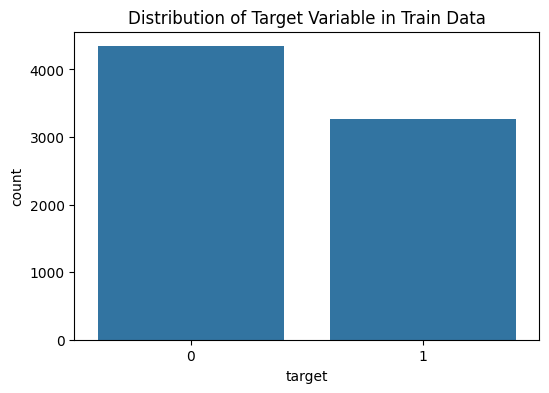

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Target Variable in Train Data')
plt.show()

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


The keyword data might need some cleaning. First, distribution might be useful.

<Axes: title={'center': 'Top Keywords by Count'}, xlabel='keyword', ylabel='count'>

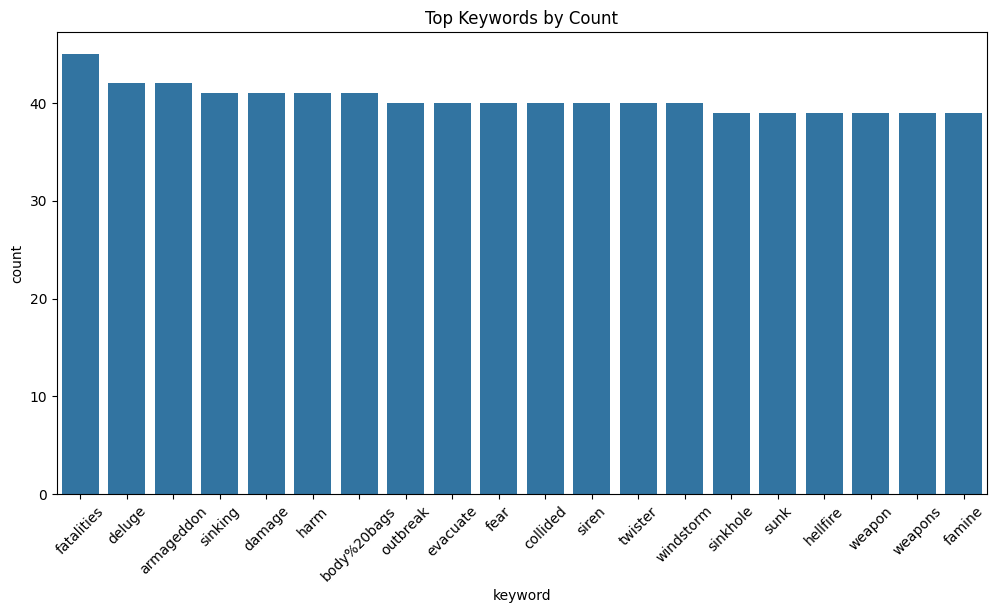

In [24]:
keyword_values = list(train_df['keyword'].value_counts())

# Graph counts of keywords
plt.figure(figsize=(12, 6))
plt.title('Top Keywords by Count')
plt.xticks(rotation=45)
sns.countplot(x='keyword', data=train_df, order=train_df['keyword'].value_counts().index[:20])